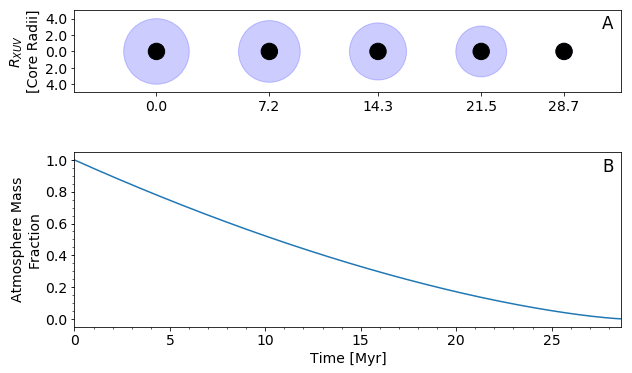

In [1]:
import SimpleModel as sm
import numpy as np
import matplotlib.pyplot as plt
import os
import astropy.units as u
import astropy.constants as const
import pdb
%matplotlib inline

In [2]:
n = 10000

dMass_planet = np.random.uniform(0.5,10,n)
dPresXUV = np.random.uniform(0.1,10,n)
dAtmGasConst = np.random.uniform(3600,4157,n)
dThermTemp = np.random.uniform(880,3000,n)
dFXUV = np.random.uniform(43,172,n)
AtmMassFrac = np.random.uniform(0.01,0.1,n)
dAtmXAbsEffH = np.random.uniform(0.1,0.6,n)
sPlanetRadiusModel = "lehmer"
dSatXUVtime = np.random.uniform(80e6,120e6,n)

In [3]:
data = sm.planet_over_time((2*const.M_earth).value, #total mass of planet
                    (0.1*u.AU).value, # semi
                    880, # temp
                    (1.94*const.M_earth).value, #mass of core
                    0, # density (not needed)
                    4157, # gas const
                    (1*const.M_sun).value) # mass of sun
data[-1]

7607559.433131701

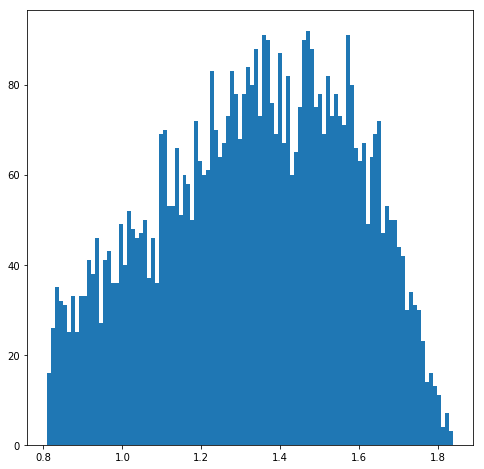

In [8]:
RadSolid_list = np.array([])
for (MassPlanet,T,alpha,Rg) in zip(dMass_planet,dThermTemp, AtmMassFrac, dAtmGasConst):
    EnvMass = MassPlanet * alpha
    core_mass = ((MassPlanet - EnvMass)*const.M_earth).value
    data = sm.planet_over_time((MassPlanet*const.M_earth).value,
                               (0.1*u.AU).value,
                               T,
                               core_mass,
                               0,
                               Rg,
                               (1*const.M_sun).value
                                  )
    if data[1][-1] == 0.0: #envelope lost
        
        RadSolid = data[-1]*u.m
        RadSolid = (RadSolid.to(u.earthRad)).value
        RadSolid_list = np.append(RadSolid_list, RadSolid)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,8)

ax.hist(RadSolid_list, bins=102);
mean = np.mean(RadSolid_list)
    

In [ ]:
dMass_planet 

In [9]:
mean

1.3332148319223338